In [ ]:
#| hide
import matplotlib.pylab as plt
import numpy as np
import matplotlib as mpl
from scipy import stats

# hydro_colors

> Painting HACC Hydrodynamical simulations using Spectral Population Synthesis

## Installation

```sh
pip install hydro_colors
```

## Simple implementation to HACC hydro data

#### 1. First we import the following modules of hydro_colors 

In [ ]:
import hydro_colors as hc
from hydro_colors.load_sim_stellar_catalog import load_hacc_galaxy_data
from hydro_colors.calculate_csp import calc_fluxes_for_galaxy
from hydro_colors.load_sps_library import STELLAR_LIBRARY_DIR

#### 2. Then the galaxy-star catalog from HACC is loaded

In [ ]:
galaxy_star_catalog_file = '../hydro_colors/data/test_hacc_stellar_catalog/Gals_Z0_576.txt'
galaxy_tags, stellar_idx, _, _, _, x, y, z, _, _, _ = hc.load_sim_stellar_catalog.load_hacc_galaxy_data(galaxy_star_catalog_file)

#### 3. After selecting a unique galaxy tag, we calculate the SED. This is the rest-frame SED is due to spectral emission alone, and without dust attenuation.  

In [ ]:
galaxy_number = 4
unique_galaxy_tag = np.unique(galaxy_tags)[galaxy_number]
print('Number of galaxies: %d'%np.unique(galaxy_tags).shape[0])

spec_wave_ssp, spec_flux_ssp, spec_csp, flux_proxy, gal_stellar_mass = hc.calculate_csp.calc_fluxes_for_galaxy(galaxy_star_catalog_file,
                                                                                                               unique_galaxy_tag,
                                                                                                               STELLAR_LIBRARY_DIR)

Number of galaxies: 10
Library shape:  (22, 94, 1963)
Wavelength shape:  (1963,)


#### 4. Finally, we plot SEDs from both SSPs and CSPs

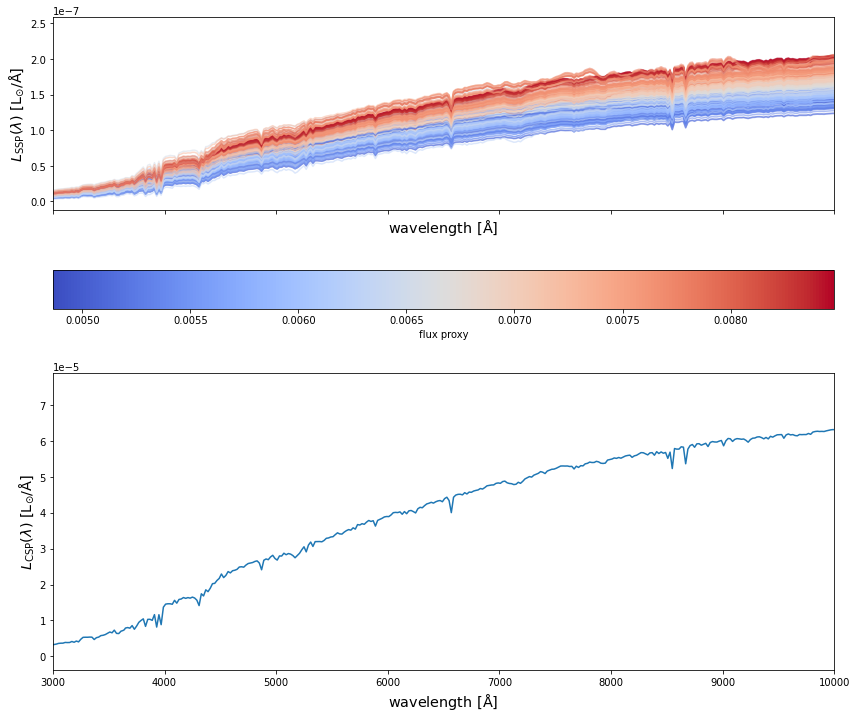

In [ ]:
fig, a = plt.subplots(2,1, figsize=(14, 12), sharex=True, sharey=False)

# Normalize the array vals so they can be mapped to a color
c_norm = mpl.colors.Normalize(vmin=np.min(flux_proxy), vmax=np.max(flux_proxy))


# Pick a colormap
c_map  = mpl.cm.coolwarm

# Scalar mappable of normalized array to colormap
s_map  = mpl.cm.ScalarMappable(cmap=c_map, norm=c_norm)
s_map.set_array([])


for idx in range(spec_flux_ssp.shape[0]):
    
    # spec_flux_ssp[idx] = spec_ssp(age_hydro[ssp_id], metal_hydro[ssp_id], mass[ssp_id])
    a[0].plot(spec_wave_ssp, spec_flux_ssp[idx], 
              # color=s_map.to_rgba(np.log10(mass[ssp_id])), 
              color=s_map.to_rgba(flux_proxy[idx]), 
              alpha=0.5)

    
# Adding the colorbar
fig.colorbar(s_map, ax = a[0], 
             orientation = 'horizontal', 
             # label=r'stellar mass', pad=0.2)
             label=r'flux proxy', pad=0.2)
    

#####################################################################

a[1].plot(spec_wave_ssp, spec_csp)


# a[0].set_ylim(1e-9, 1e-6)
# a[0].set_yscale('log')
# a[1].set_yscale('log')
# a[1].set_xscale('log')
a[1].set_xlim(3e3, 1e4)


a[0].set_xlabel(r'${\rm wavelength\ [\AA]}$', fontsize = 'x-large')
a[1].set_xlabel(r'${\rm wavelength\ [\AA]}$', fontsize = 'x-large')
a[0].set_ylabel(r'$L_{\rm SSP}(\lambda)\ {\rm [L_{\odot}/\AA]}$', fontsize = 'x-large')
a[1].set_ylabel(r'$L_{\rm CSP}(\lambda)\ {\rm [L_{\odot}/\AA]}$', fontsize = 'x-large')


plt.show()

### One can also find luminosity profiles for the simulated galaxies

#### 1. First we project the luminosity on to grids

In [ ]:
gal_tag_cond = np.where(galaxy_tags == unique_galaxy_tag)


nbins = 40
xedges = np.linspace(x[gal_tag_cond].min(), x[gal_tag_cond].max(), nbins) 
yedges = np.linspace(y[gal_tag_cond].min(), y[gal_tag_cond].max(), nbins) 


H, xedges, yedges, binnumber = stats.binned_statistic_2d(x[gal_tag_cond], y[gal_tag_cond], 
                                                         None, 'count', bins=[xedges, yedges],
                                                         expand_binnumbers=True)



grid_flux = np.zeros_like(H)

for idx, ssp_id in enumerate(gal_tag_cond[0]):

    grid_flux[binnumber[:, idx][0]-1, binnumber[:, idx][1]-1] = np.trapz(spec_flux_ssp[idx], spec_wave_ssp)

#### 2. Next we plot the stellar density and luminosity profiles

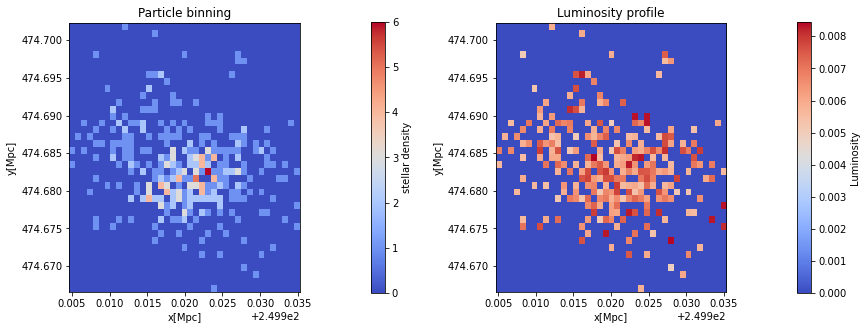

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
c_norm = mpl.colors.Normalize(vmin=1, vmax=np.max(H))
c_map  = mpl.cm.coolwarm


ax[0].set_title('Particle binning')

im = ax[0].imshow(H, interpolation='nearest', origin='lower', 
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                cmap=c_map)

fig.colorbar(im, ax = ax[0], 
             orientation = 'vertical', 
             # label=r'stellar mass', pad=0.2)
             label=r'stellar density', pad=0.2)


# Normalize the array vals so they can be mapped to a color
c_norm = mpl.colors.Normalize(vmin=np.min(grid_flux.min()), vmax=np.max(grid_flux))
c_norm = mpl.colors.Normalize(vmin=0.004, vmax=np.max(grid_flux))

# # Pick a colormap
# c_map  = mpl.cm.magma


ax[1].set_title('Luminosity profile')
im = ax[1].imshow(grid_flux, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=c_map)

# Adding the colorbar
fig.colorbar(im, ax = ax[1], 
             orientation = 'vertical', 
             # label=r'stellar mass', pad=0.2)
             label=r'Luminosity', pad=0.2)


ax[0].set_xlabel('x[Mpc]')
ax[0].set_ylabel('y[Mpc]')
ax[1].set_xlabel('x[Mpc]')
ax[1].set_ylabel('y[Mpc]')

plt.show()

## Under the hood

In [ ]:
from hydro_colors.load_sps_library import *
from hydro_colors.load_sim_stellar_catalog import *

Library shape:  (22, 94, 1963)
Wavelength shape:  (1963,)


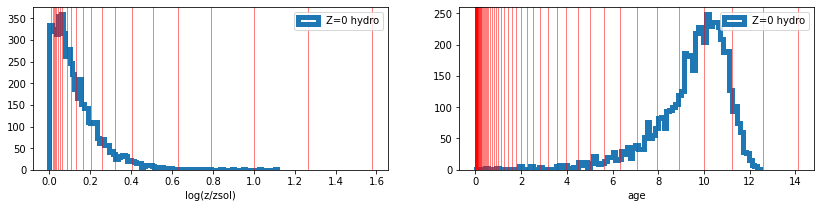

In [ ]:
spec_flux, spec_wave = load_fsps_spectral_library()
age_fsps_gyr, Z_padova_fsps = load_fsps_age_metallicity()
gal_tag, stellar_idx, metal_hydro, mass, age_hydro, x, y, z, vx, vy, vz = load_hacc_galaxy_data()


f, a = plt.subplots(1,2, figsize=(14, 3))
a[0].hist(metal_hydro, bins = 100, histtype='step', lw=5, label='Z=0 hydro');
[a[0].axvline(_x, linewidth=1, color='r', alpha=0.5) for _x in Z_padova_fsps];
a[0].legend()
a[0].set_xlabel('log(z/zsol)')


a[1].hist(age_hydro, bins = 100, histtype='step', lw=5, label='Z=0 hydro');
[a[1].axvline(_x, linewidth=1, color='r', alpha=0.5) for _x in age_fsps_gyr];
a[1].legend()
a[1].set_xlabel('age')

plt.show()